Problem Statement

The above introduction had an aim to increase the awareness about how the income factor actually has an impact not only on the personal lives of people, but also an impact on the nation and its betterment. We will today have a look on the data extracted from the 1994 Census bureau database, and try to find insights about how different features have an impact on the income of an individual. Though the data is quite old, and the insights drawn cannot be directly used for derivation in the modern world, but it would surely help us to analyze what role different features play in predicting the income of an individual.

The Dataset

The dataset provided to us contains 32560 rows, and 14 different independent features. We aim to predict if a person earns more than 50k$ per year or not. Since the data predicts 2 values (>50K or <=50K), this clearly is a classification problem, and we will train the classification models to predict the desired outputs.

Mentioned below are the details of the features provided to us, which we will be feeding to our classification model to train it.


1. Age — The age of an individual, this ranges from 17 to 90.

2. Workclass — The class of work to which an individual belongs.

3. Fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)

4. Education — Highest level of education

5. Education_num — Number of years for which education was taken

6. Marital_Status — Represents the category assigned on the basis of marriage status of a person

7. Occupation — Profession of a person

8. Relationship — Relation of the person in his family

9. Race — Origin background of a person

10. Sex — Gender of a person

11. Capital_gain — Capital gained by a person

12. Capital_loss — Loss of capital for a person

13. Hours_per_week — Number of hours for which an individual works per week

14. Native_Country — Country to which a person belongs

Output:

1. Income — The target variable, which predicts if the income is higher or lower than 50K$.

#Import necessary libraries 

In [ ]:
#pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#pip install xgboost

In [3]:
#pip install catboost

In [4]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
#pip install imblearn

In [6]:
#pip install feature_engine

In [7]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import  RandomOverSampler

In [8]:
from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [9]:
#Loading dataset 
df=pd.read_csv(r"C:\\Users\\shree\\Downloads\adult.csv")

Step 1: Descriptive analysis

In [10]:
#top 5 rows 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
#bottom 5 rows 
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
31103,20,Private,303565,Some-college,10,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,Germany,<=50K
21187,46,Self-emp-not-inc,231347,Some-college,10,Separated,Prof-specialty,Not-in-family,White,Male,0,0,20,United-States,<=50K
16304,38,Private,210866,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,44,United-States,>50K
25888,35,Private,198202,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,54,United-States,<=50K
2723,31,State-gov,75755,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,55,United-States,>50K


In [13]:
#finding shape of dataframne
df.shape

(32561, 15)

In [14]:
#Numeric Features :
Numeric_Features=[col for col in df.columns if df[col].dtypes!='O']
Numeric_Features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [15]:
Categorical_Features=[col for col in df.columns if df[col].dtypes=='O']
Categorical_Features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

Data Cleaning :

In [16]:
#finding duplicate records insdie dataframe 
df.duplicated().sum()

24

In [17]:
#drop duplicates 
df.drop_duplicates(inplace=True)

In [18]:
#removing unwanted spaces fro mfeatures names
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [19]:
#Replcaing .in column names by '_'
df = df.rename(columns=lambda x: x.replace('.', '_'))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [22]:
#dataframe showing 0 null values since we have some data missing in the form of ? lets find %of data having missing values in ?
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

In [23]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    1.79 %
income             0.0 %
dtype: object

In [24]:
df.replace({'?':np.NaN},inplace=True)

In [25]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [26]:
#We have missing data in workclass,occupation and native.country column

In [27]:
#Chekcing the distribution of our target feature our target feature is income 
df['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

Observation :It is clearly visible our dataset is imbalanced we have to handle it 

Step 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Cardinality')

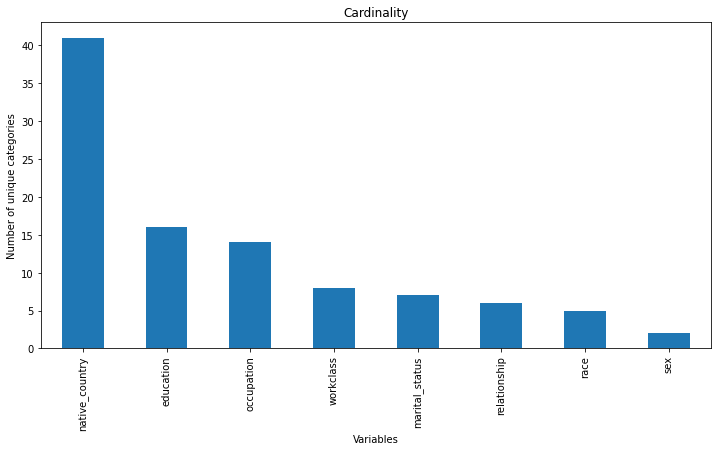

In [28]:
#Finding the cardinality of categorical Features inside dataframe
df[['workclass','education','marital_status','occupation','relationship','race','sex','native_country']].nunique().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

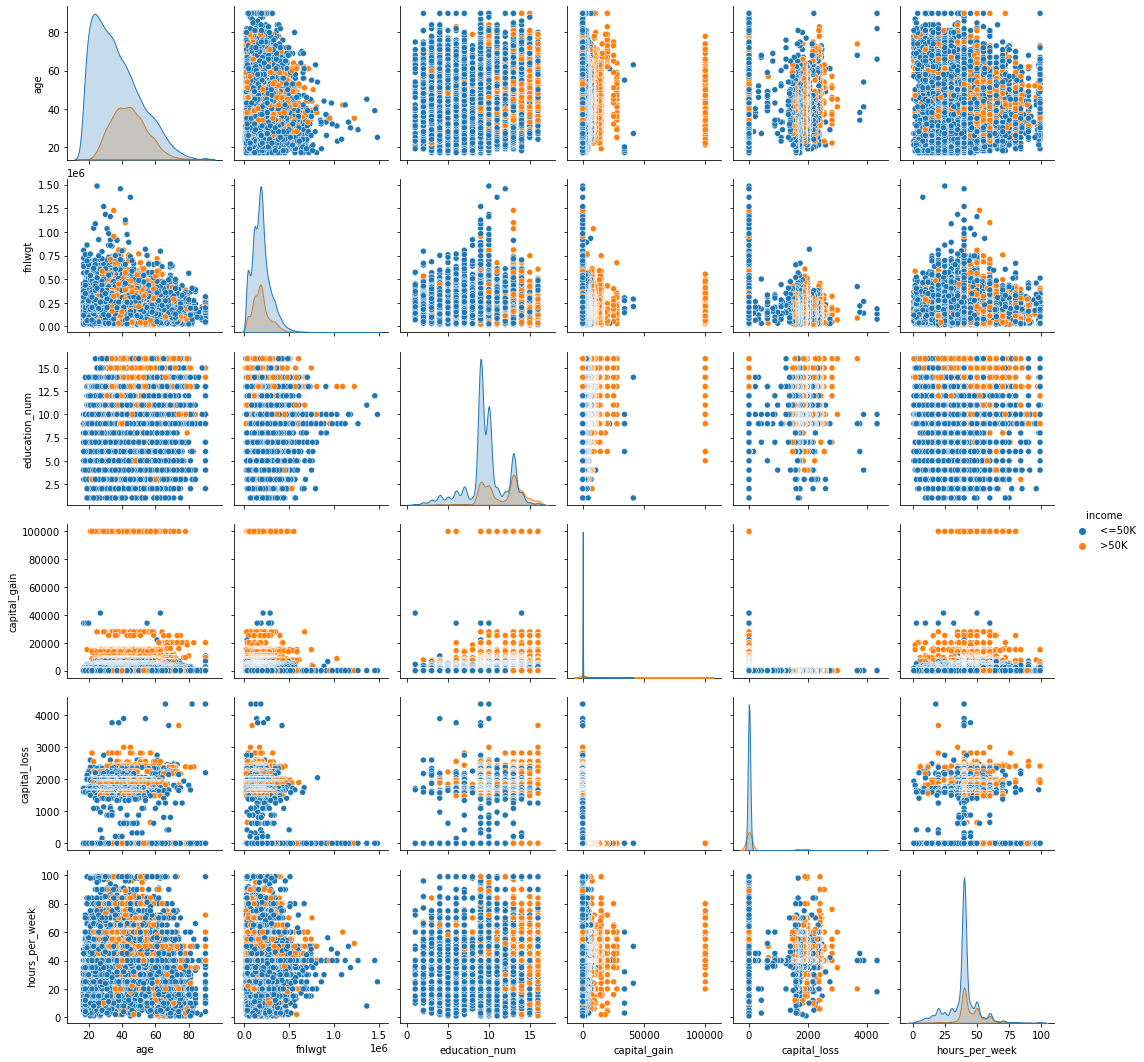

In [29]:
sns.pairplot(df,hue='income')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

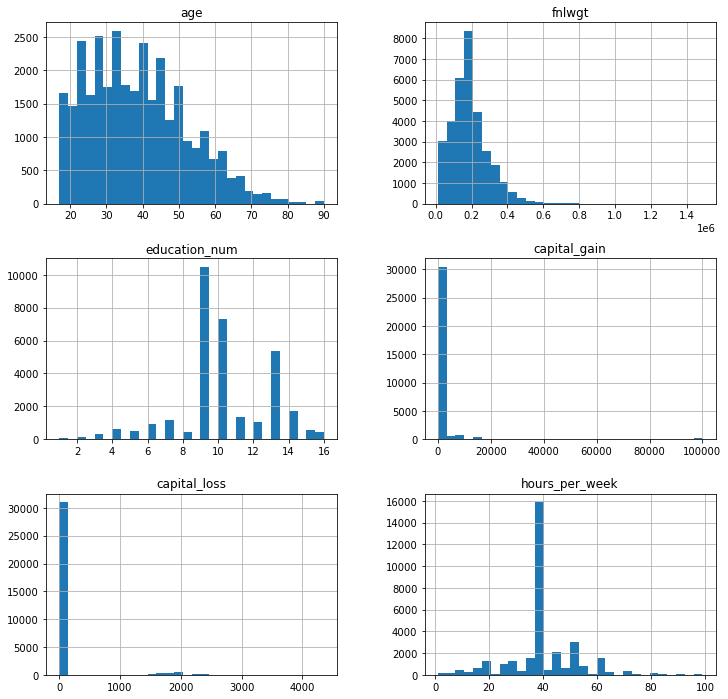

In [30]:
#lets see the univariate analysis 
#Finding the normal distribution of Numerical Features inside the dataframe 
df.hist(bins=30, figsize=(12,12))

In [31]:
#our numeric features are not normely distributed .Since we are dealing with classification problem we will not take care about it 

Workclass Distribution :


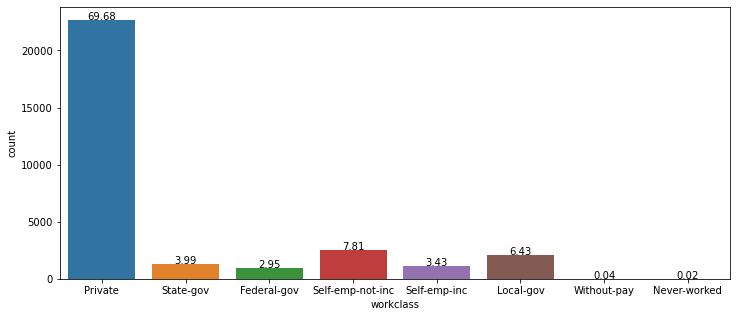

In [32]:
plt.figure(figsize=(12,5))
total = float(len(df['income']) )
ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Obsearvation:from workclass without pay and nevwer worked make no sense we can drop them

Occupation Distribution :

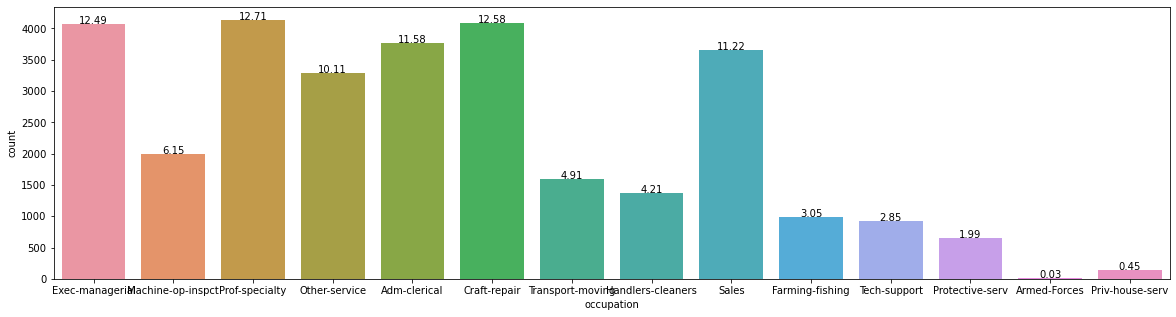

In [33]:
plt.figure(figsize=(20,5))
total = float(len(df['income']) )
ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

EDUCATION DISTRIBUTION :

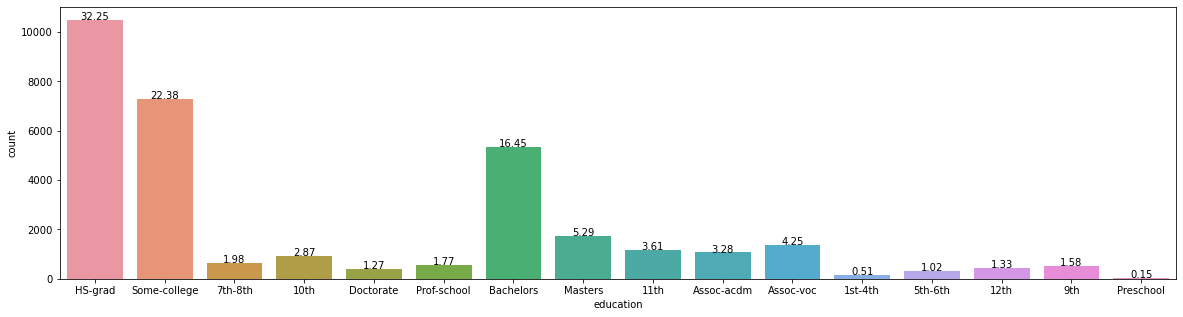

In [34]:
plt.figure(figsize=(20,5))
total = float(len(df['income']) )
ax = sns.countplot(x="education", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

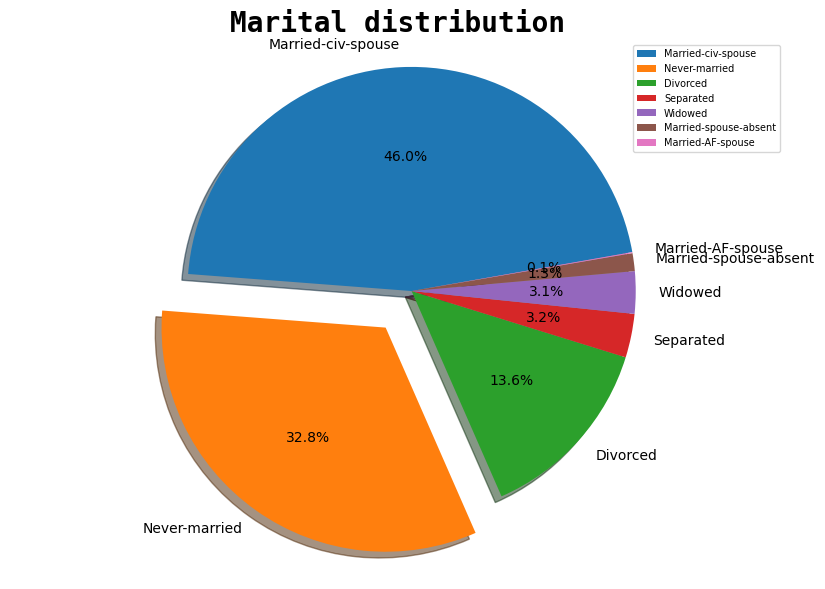

In [35]:
# Creating a pie chart for 'Marital status'
marital = df['marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

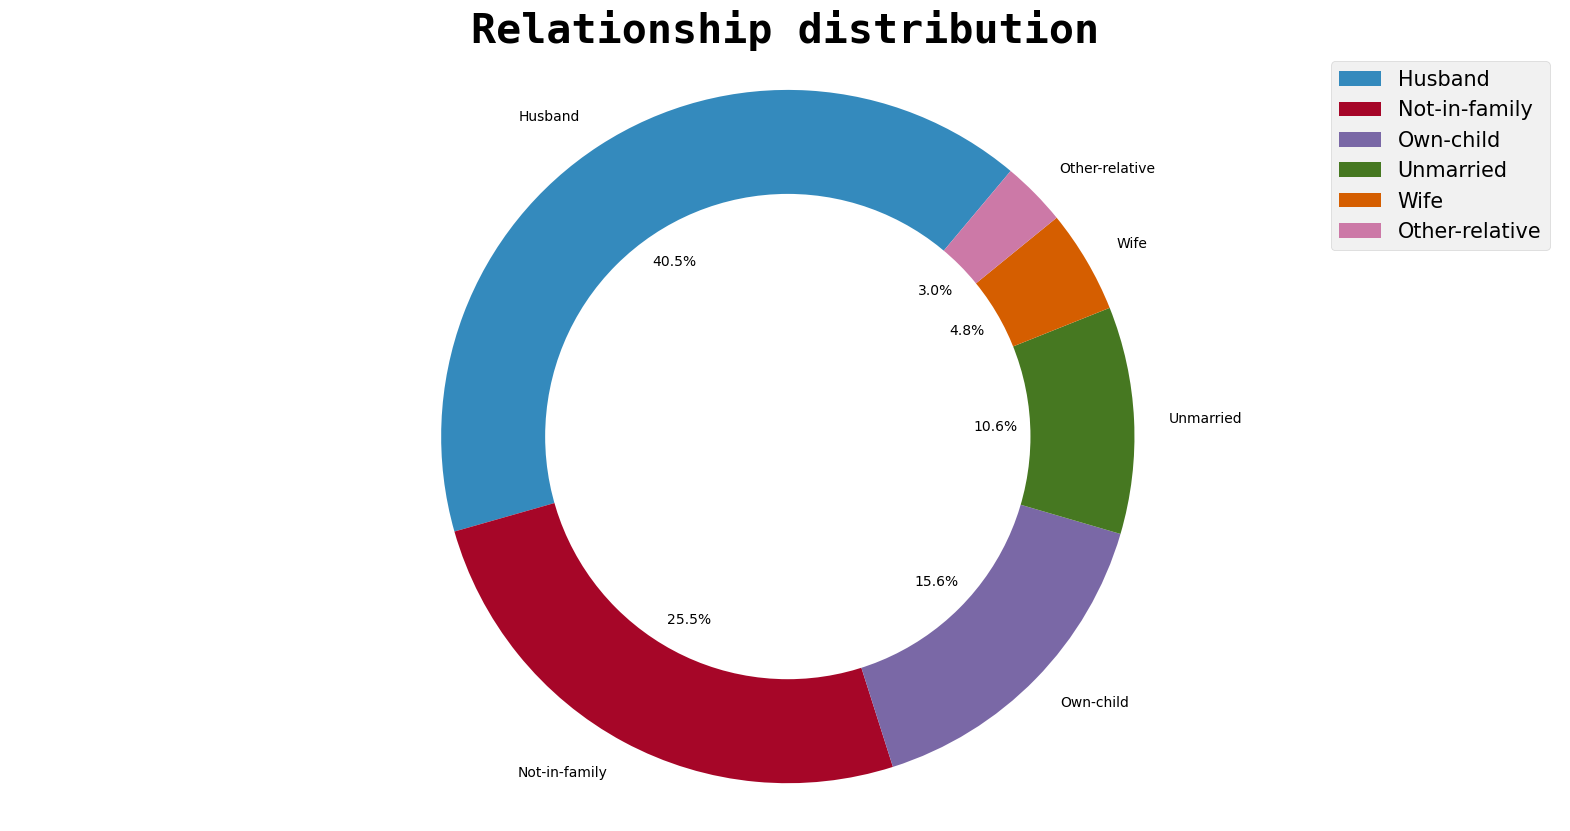

In [36]:
# Creating a donut chart for 'Age'
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

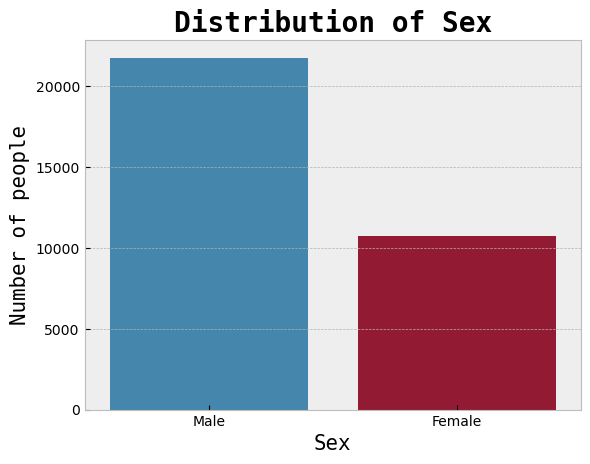

In [37]:
# Creating a barplot for 'Sex'
sex = df['sex'].value_counts()
sns.barplot(x=sex.index,y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)

Obesravation :In race distribution we have majority of White and Blck category

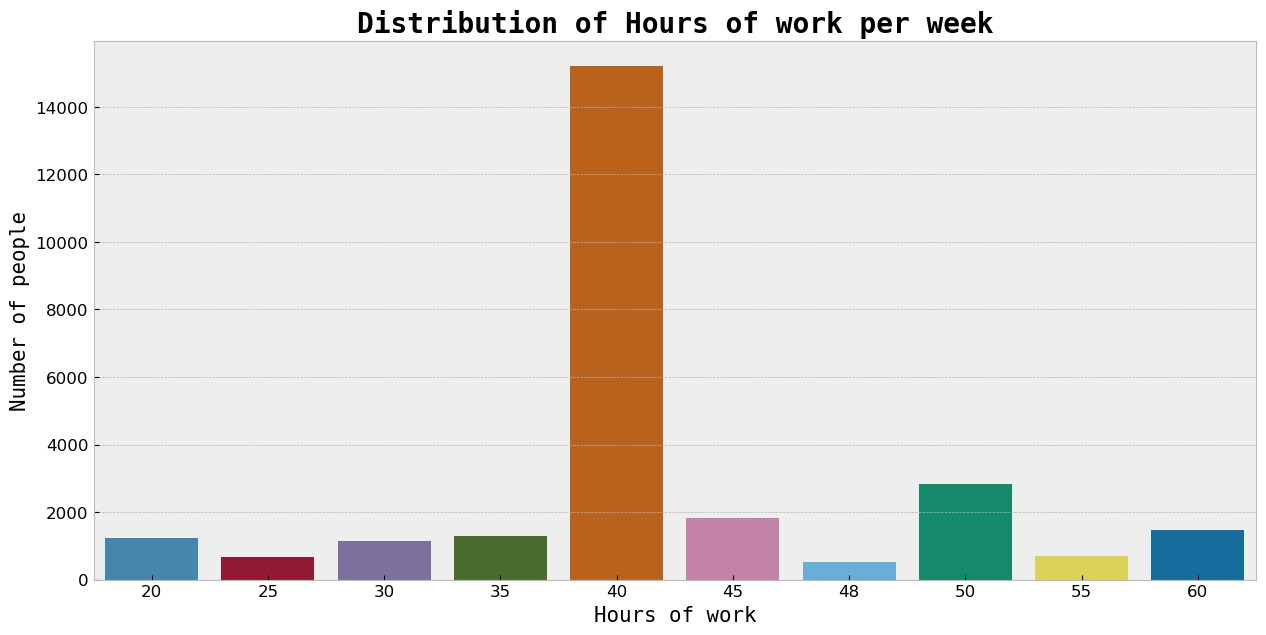

In [38]:
# Creating a barplot for 'Hours per week'
hours = df['hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values)
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Bivariate Analysis:

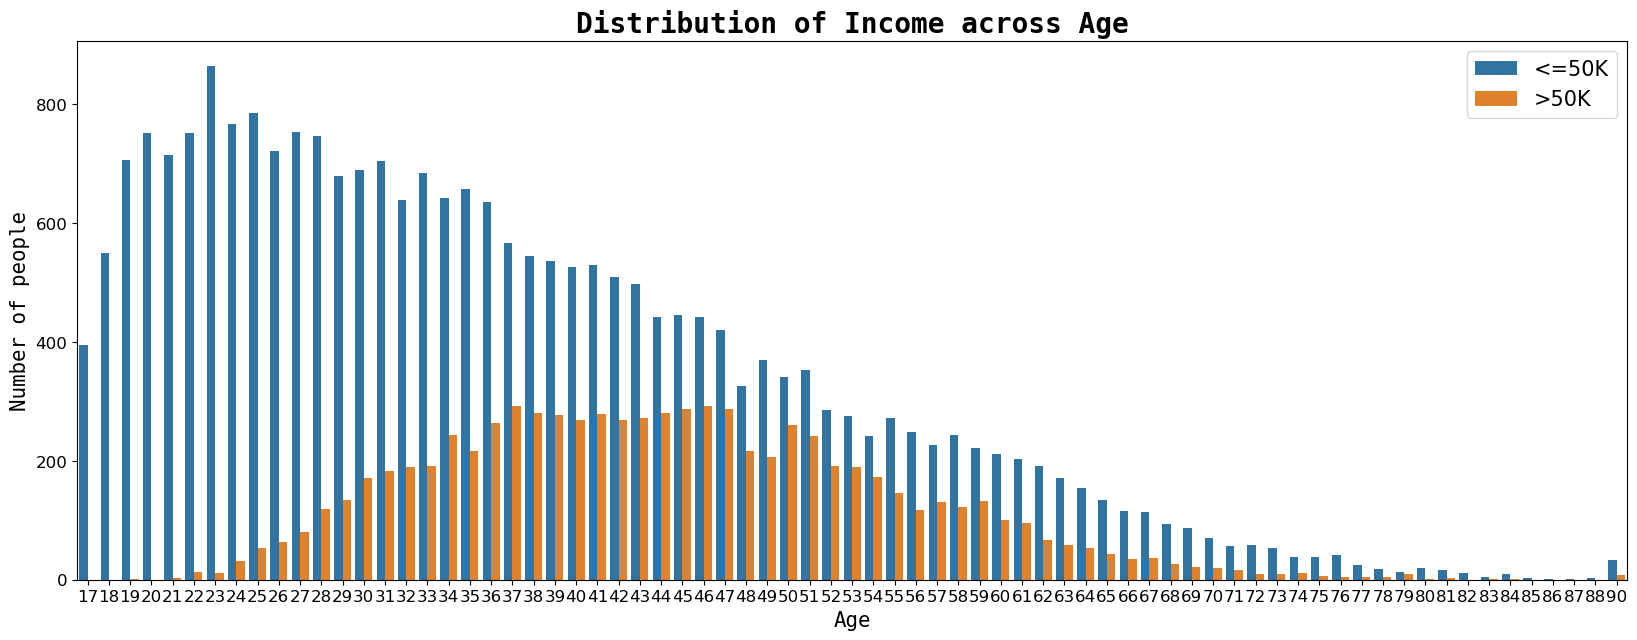

In [39]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

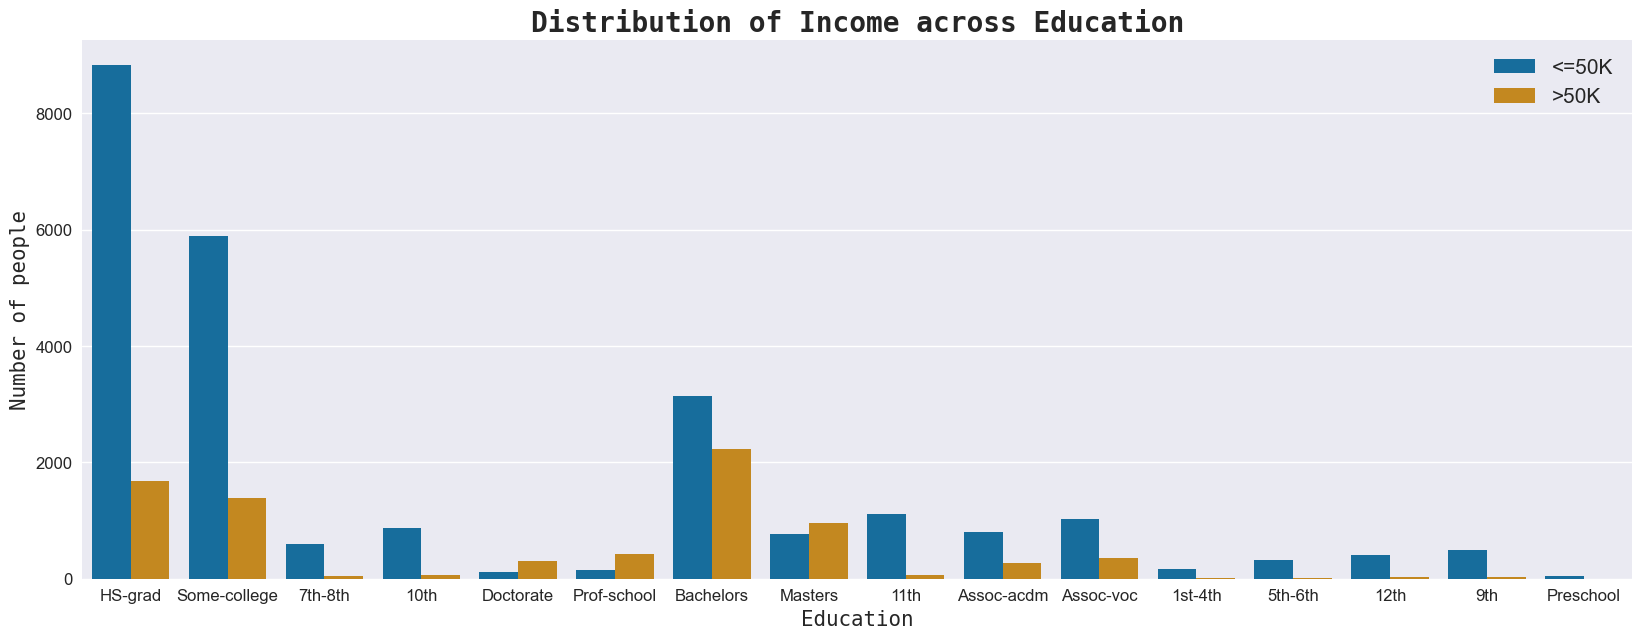

In [40]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

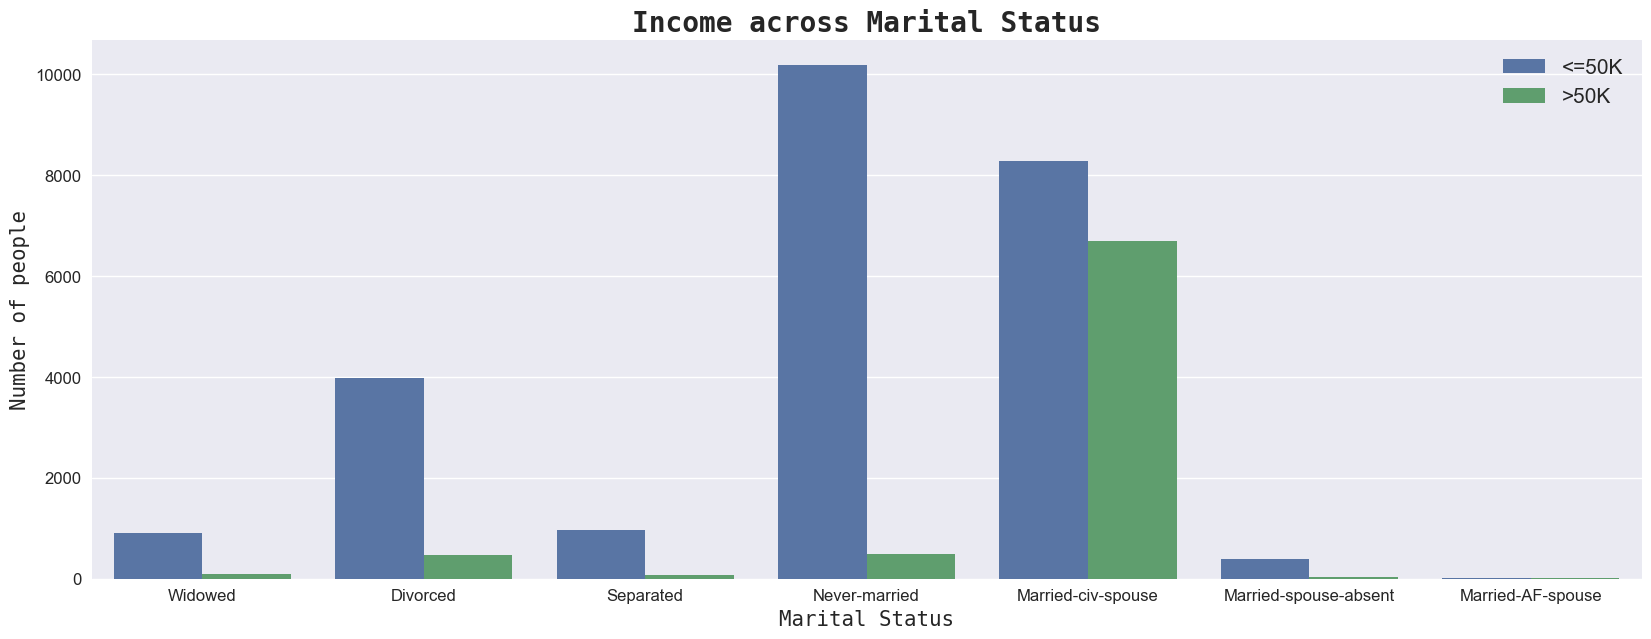

In [41]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

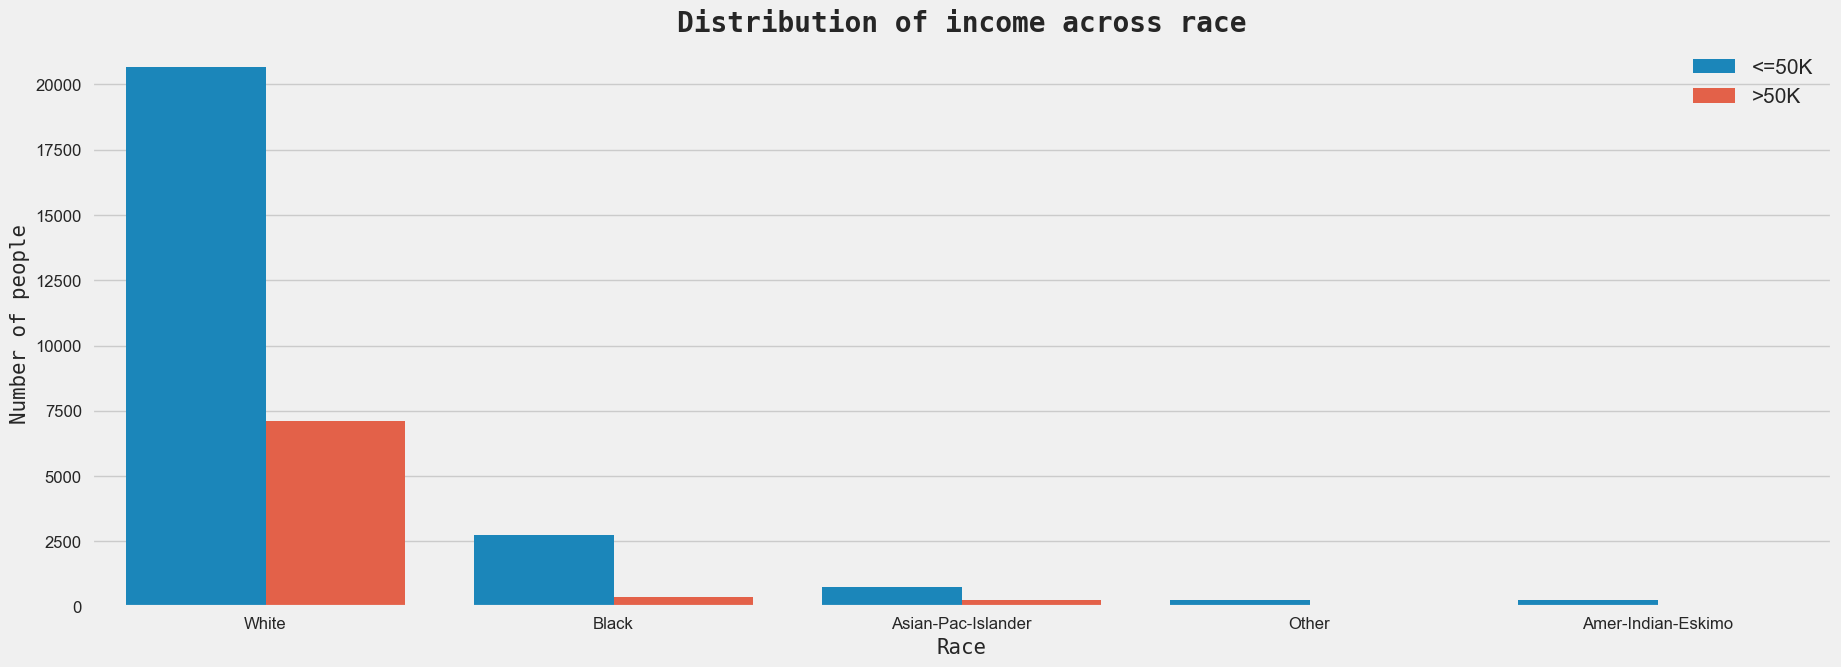

In [42]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


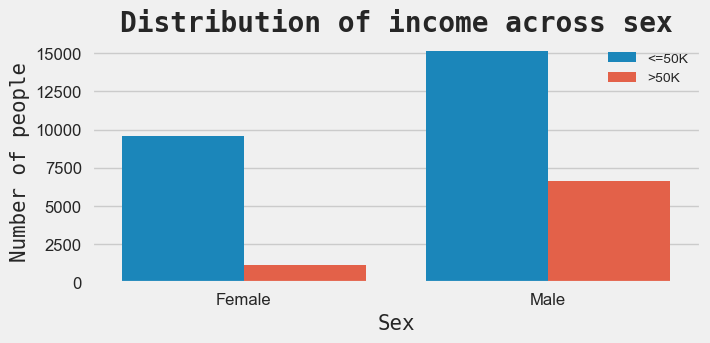

In [43]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=df['sex'], hue=df['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()


In [44]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Multivariate Analysis:

In [45]:
label=LabelEncoder()
df['income']=label.fit_transform(df['income'])

In [46]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education_num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


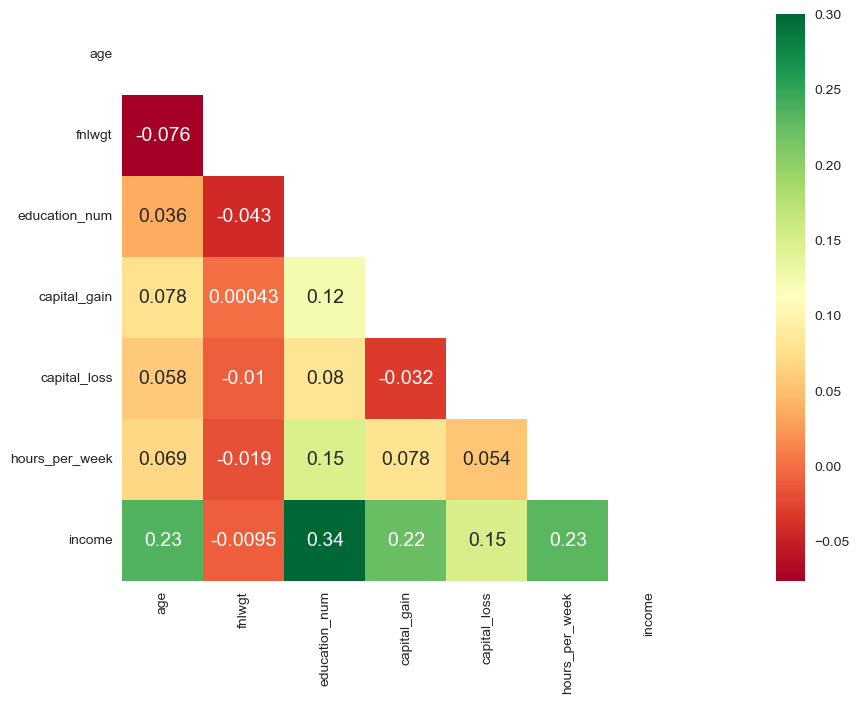

In [47]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

# Data Preprocessing:

In [48]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [49]:
df.isna().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native_country     582
age                  0
fnlwgt               0
education            0
education_num        0
marital_status       0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
income               0
dtype: int64

In [50]:
df.to_csv("clean_dataset.csv")

FEATURE ENGINEERING 

In [51]:
df=pd.read_csv("clean_dataset.csv")

In [52]:
df=df.drop('Unnamed: 0',axis=1)

In [53]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [56]:
df['marital_status'].unique()

array(['single', 'married'], dtype=object)

In [57]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,single,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,single,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [58]:
# We observe that higher the degree of a person, higher is the education_num
# So we need not do any Label Encoding here, as ranks are already assigned in the desired format
# Creating a dataframe to know which rank belongs to which degree
df_education_labels = df.groupby(by = 'education').describe()['education_num']['mean'].sort_values().reset_index()
df_education_labels

,education,mean
0,Preschool,1.0
1,1st-4th,2.0
2,5th-6th,3.0
3,7th-8th,4.0
4,9th,5.0
5,10th,6.0
6,11th,7.0
7,12th,8.0
8,HS-grad,9.0
9,Some-college,10.0


In [59]:
# Naming education_num as education_rank

df.rename(columns = {'education_num': 'education_rank'}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,single,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,single,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [60]:
# displaying unique countries with value counts in percentage
df['native_country'].value_counts(normalize = True)*100

United-States                 91.231419
Mexico                         1.999687
Philippines                    0.619621
Germany                        0.428728
Canada                         0.378657
Puerto-Rico                    0.356752
El-Salvador                    0.331716
India                          0.312940
Cuba                           0.297293
England                        0.281646
Jamaica                        0.253481
South                          0.250352
China                          0.234705
Italy                          0.228446
Dominican-Republic             0.219058
Vietnam                        0.209670
Guatemala                      0.194023
Japan                          0.194023
Poland                         0.187764
Columbia                       0.184635
Taiwan                         0.159599
Haiti                          0.137694
Iran                           0.134564
Portugal                       0.115788
Nicaragua                      0.106400


In [61]:
# naming less frequent countries as others (having value counts less than 0.3% of total values)
percentage_threshold = 0.3
arr_others = df['native_country'].value_counts()[df['native_country'].value_counts(normalize=True)*100 < percentage_threshold].index
df['native_country'].replace(to_replace=arr_others, value = ['others']*len(arr_others), inplace=True)

<AxesSubplot:xlabel='native_country', ylabel='count'>

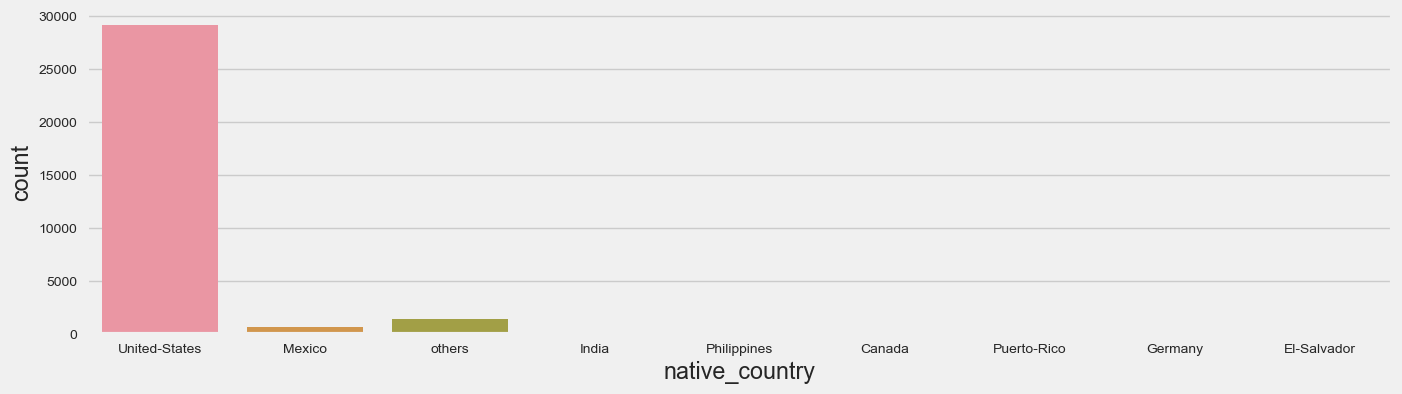

In [62]:
plt.figure(figsize = (15,4))
sns.countplot(x= 'native_country', data = df)

In [63]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [64]:
df['workclass']=df['workclass'].replace(['Private'],'Private')
df['workclass']=df['workclass'].replace(['State-gov','Local-gov','Federal-gov'],'Government')
df['workclass']=df['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'OwnBusiness')
df['workclass']=df['workclass'].replace('others','Others')

In [65]:
df['workclass'].unique()

array([nan, 'Private', 'Government', 'OwnBusiness', 'Without-pay',
       'Never-worked'], dtype=object)

In [66]:
df['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [94]:
df_copy=df.copy()

In [95]:
Numeric_Features=[col for col in df.columns if df_copy[col].dtypes!='O']
Numeric_Features

['age',
 'fnlwgt',
 'education_rank',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

In [92]:
Numeric_Features.remove('income')

In [93]:
Numeric_Features

['age',
 'fnlwgt',
 'education_rank',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [96]:
Categorical_Features=[col for col in df.columns if df_copy[col].dtypes=='O']
Categorical_Features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [97]:
df_copy.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_rank       0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

# Filling missing Data in mode value 

In [98]:
columns_with_nan = ['workclass', 'occupation', 'native_country']

In [99]:
for col in columns_with_nan:
    df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)

In [100]:
df_copy.head(2)

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,single,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
X=df_copy.drop('income',axis=1)
y=df_copy['income']

In [103]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(y)

In [104]:
for col in df_copy.columns :
    if df_copy[col].dtype=='object':
        encoder=LabelEncoder()
        df_copy[col]=encoder.fit_transform(df_copy[col])

In [105]:
df_copy.head(2)

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,1,9,1,4,0,0,4356,40,7,0
1,82,3,132870,11,9,1,3,1,4,0,0,4356,18,7,0


# Feature Selection 

In [107]:
X=df_copy.drop('income',axis=1)
y=df_copy['income']


In [108]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()

In [109]:
selector.fit(X,y)

ExtraTreesClassifier()

In [111]:
feature_imp=selector.feature_importances_
feature_imp

array([0.16850195, 0.02350801, 0.17725716, 0.0356132 , 0.09147144,
       0.01299536, 0.07609775, 0.13262575, 0.01577117, 0.03241631,
       0.08900545, 0.02957304, 0.09957525, 0.01558815])

In [113]:
for index ,val in enumerate(feature_imp):
    print(index,round((val*100),2))

0 16.85
1 2.35
2 17.73
3 3.56
4 9.15
5 1.3
6 7.61
7 13.26
8 1.58
9 3.24
10 8.9
11 2.96
12 9.96
13 1.56


In [115]:
X.head()

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,90,3,77053,11,9,1,9,1,4,0,0,4356,40,7
1,82,3,132870,11,9,1,3,1,4,0,0,4356,18,7
2,66,3,186061,15,10,1,9,4,2,0,0,4356,40,7
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,7
4,41,3,264663,15,10,1,9,3,4,0,0,3900,40,7


In [ ]:
#Dropping columns which are not relevant for prediction workclass,education,marital_status,race,sex,capital_loss,native_country

In [116]:
df_copy.drop(columns=['workclass','education','marital_status','race','sex','capital_loss','native_country'],axis=1,inplace=True)

In [117]:
df_copy.head()

,age,fnlwgt,education_rank,occupation,relationship,capital_gain,hours_per_week,income
0,90,77053,9,9,1,0,40,0
1,82,132870,9,3,1,0,18,0
2,66,186061,10,9,4,0,40,0
3,54,140359,4,6,4,0,40,0
4,41,264663,10,9,3,0,40,0


# FEATURE SCALING 

In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [119]:
X=df_copy.drop('income',axis=1)
y=df_copy['income']

In [120]:
X=scaler.fit_transform(X)

# HANDLING IMBALANCED DATASET 

In [121]:
ros=RandomOverSampler(random_state=42)

In [123]:
X_resampled,y_resampled=ros.fit_resample(X,y)

# MODEL SELECTION 

In [124]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [125]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [126]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    train_accuracy=[]
    test_accuracy=[]
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')
        train_accuracy.append(model_train_accuracy)


        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        test_accuracy.append(model_test_accuracy)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, train_accuracy,test_accuracy,cost_list)), columns=['Model Name', 'Train_Accuracy','Test_Accuracy','Cost']).sort_values(by=["Cost"])
        
    return report

In [127]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
     "XGBClassifier": XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Classifier":SVC()
}

In [128]:
# Training all models
report_mean = evaluate_models(X_resampled,y_resampled,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
- COST: 30.
----------------------------------
Model performance for Test set
- Accuracy: 0.9289
- F1 score: 0.9319
- Precision: 0.8888
- Recall: 0.9794
- Roc Auc Score: 0.9293
- COST: 56510.


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9998
- Recall: 1.0000
- Roc Auc Score: 0.9999
- COST: 30.
----------------------------------
Model performance for Test set
- Accuracy: 0.9123
- F1 score: 0.9165
- Precision: 0.8694
- Recall: 0.9690
- Roc Auc Score: 0.9127
- COST: 83140.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8355
- F1 score: 0.8407
- Precision: 0.8164
- Recall: 0.8665
- Roc Auc Score: 0.8355
- COST: 1360070.
----------------------------------
Model performance for Test set
- Accuracy: 0.8350
- F1 score: 0.8398
- Precision: 0.8111
- Recall: 0.8706
- Roc 

In [129]:
report_mean

,Model Name,Train_Accuracy,Test_Accuracy,Cost
0,Random Forest,0.999924,0.928947,56510
1,Decision Tree,0.999924,0.912348,83140
5,XGBClassifier,0.918008,0.877834,200230
4,K-Neighbors Classifier,0.887919,0.835526,243610
6,CatBoosting Classifier,0.875342,0.857895,264920
8,Support Vector Classifier,0.818327,0.817713,308090
2,Gradient Boosting,0.835510,0.835020,327450
7,AdaBoost Classifier,0.824172,0.828138,354100
3,Logistic Regression,0.751367,0.749696,641150


# Lets do crossvalidation

In [130]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True,random_state=3)
k_f

KFold(n_splits=4, random_state=3, shuffle=True)

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=3)

In [132]:
xgb=XGBClassifier()
tree=DecisionTreeClassifier()
rand=RandomForestClassifier()

In [133]:
print("Cross validation score for xgboost model==>",cross_val_score(xgb,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rand,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for CatBoostClassifier",cross_val_score(tree,X_train,y_train,cv=5).mean())

Cross validation score for xgboost model==> 0.8607399127374886
Mean of cross validation score for Random Forest model==> 0.9104412189600526
Mean of cross validation score for CatBoostClassifier 0.8930812096159866


# Lets do hyperparameter tunnig 

In [134]:
n_estimators=[int(x) for x in np.linspace(start=40,stop=200,num=15)]
max_depth=[int (x)for x in np.linspace(40,200,num=15)]
parameters={
    'n_estimators':n_estimators,
    'max_depth':max_depth
}

In [135]:
rf_tuned=RandomForestClassifier(random_state=30)
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=3)
rf_cv=RandomizedSearchCV(estimator=rf_tuned,param_distributions=parameters,cv=5,random_state=42)

In [136]:
rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 51, 62, 74, 85, 97,
                                                      108, 120, 131, 142, 154,
                                                      165, 177, 188, 200],
                                        'n_estimators': [40, 51, 62, 74, 85, 97,
                                                         108, 120, 131, 142,
                                                         154, 165, 177, 188,
                                                         200]},
                   random_state=42)

In [137]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 131}

In [138]:
rf_cv.best_score_

0.9099857405658998

In [139]:
random_rc=RandomForestClassifier(n_estimators=40,max_depth=131,random_state=30)
random_rc.fit(X_train,y_train)
print("Accuracy",accuracy_score(y_test,random_rc.predict(X_test)))

Accuracy 0.9227732793522267


In [149]:
random_rc.predict(scaler.transform(np.array([[31,77053,9,9,1,0,40]])))[0]

0

In [155]:
df_copy.head(2)

,age,fnlwgt,education_rank,occupation,relationship,capital_gain,hours_per_week,income
0,90,77053,9,9,1,0,40,0
1,82,132870,9,3,1,0,18,0


In [154]:
df.head(2)

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,single,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


In [180]:
df2=df
df2['income']=LabelEncoder().fit_transform(df2['income'])
df2=df2.replace('?',np.nan)
columns_with_missing_values=['workclass','occupation','native_country']
for col in columns_with_missing_values:
    df2[col].fillna(df2[col].mode()[0],inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df2.columns:
    if df2[col].dtypes=='object':
        df2[col]=encoder.fit_transform(df2[col])
X=df2.drop('income',axis=1)
y=df['income']
X=X.drop(columns=['workclass','education','marital_status','race','sex','capital_loss','native_country'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X1,y1=ros.fit_resample(X,y)
ran=RandomForestClassifier(n_estimators=40,max_depth=131,random_state=30)
ran.fit(X,y)
import pickle
pickle.dump(ran,open('model.pkl','wb'))

In [181]:
model=pickle.load(open('model.pkl','rb'))
model.predict(scaler.transform(np.array([[82,132870,9,3,1,0,18]])))

array([0], dtype=int64)

In [183]:
df.head()

,age,workclass,fnlwgt,education,education_rank,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,single,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,single,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [184]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)